In [1]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'},
]

In [2]:
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};

In [3]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [4]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [5]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [6]:
sample = ['problem of evil', 'evil queen', 'horizon problem']

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
x = vec.fit_transform(sample)
x

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [8]:
import pandas as pd
pd.DataFrame(x.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
x = vec.fit_transform(sample)
pd.DataFrame(x.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


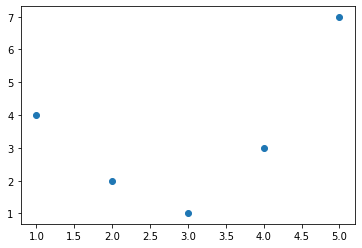

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

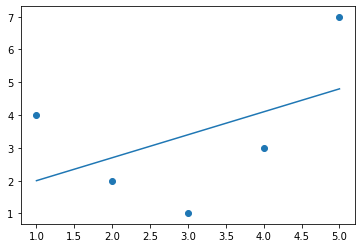

In [11]:
from sklearn.linear_model import LinearRegression
x = x[:, np.newaxis]
model = LinearRegression().fit(x, y)
yfit = model.predict(x)
plt.scatter(x, y)
plt.plot(x, yfit);

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
x2 = poly.fit_transform(x)
print(x2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


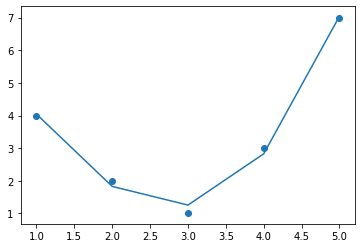

In [13]:
model = LinearRegression().fit(x2, y)
yfit = model.predict(x2)
plt.scatter(x, y)
plt.plot(x, yfit);

In [14]:
from numpy import nan
x = np.array([[nan, 0, 3],
              [3, 7, 9],
              [3, 5, 2],
              [4, nan, 6],
              [8, 8, 1]])
y = np.array([14, 16, -1, 8, -5])

In [15]:
# from sklearn.preprocessing import Imputer
# imp = Imputer(strategy = 'mean')
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
x2 = imp.fit_transform(x)
x2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [16]:
model = LinearRegression().fit(x2, y)
model.predict(x2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

In [17]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(SimpleImputer(strategy='mean'), PolynomialFeatures(degree=2),
                     LinearRegression())

In [18]:
model.fit(x, y)
print(y)
print(model.predict(x))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]
